In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf  # Added import for TensorFlow

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%%time
df_d1 = pd.read_csv("data/02-14-2018.csv", low_memory=False)
df_d2 = pd.read_csv("data/02-15-2018.csv", low_memory=False)
df_d3 = pd.read_csv("data/02-16-2018.csv", low_memory=False)
df_d4 = pd.read_csv("data/02-20-2018.csv", low_memory=False)
df_d5 = pd.read_csv("data/02-21-2018.csv", low_memory=False)
df_d6 = pd.read_csv("data/02-22-2018.csv", low_memory=False)
df_d7 = pd.read_csv("data/02-23-2018.csv", low_memory=False)
df_d8 = pd.read_csv("data/02-28-2018.csv", low_memory=False)
df_d9 = pd.read_csv("data/03-01-2018.csv", low_memory=False)
df_d10 = pd.read_csv("data/03-02-2018.csv", low_memory=False)

CPU times: user 2min 1s, sys: 2min 59s, total: 5min 1s
Wall time: 6min 35s


In [5]:
df_d4.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1,inplace=True)

In [6]:
def fix_data_type(df):
    
    df = df[df['Dst Port'] != 'Dst Port']
    
    df['Dst Port'] = df['Dst Port'].astype(int)
    df['Protocol'] = df['Protocol'].astype(int)
    df['Flow Duration'] = df['Flow Duration'].astype(int)
    df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(int)
    df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(int)
    df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(int)
    df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(int)
    df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(int)
    df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(int)
    df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(float)
    df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(float)
    df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(int)
    df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(int)
    df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(float)
    df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(float)
    df['Flow Byts/s'] = df['Flow Byts/s'].astype(float)
    df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(float)
    df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(float)
    df['Flow IAT Std'] = df['Flow IAT Std'].astype(float)
    df['Flow IAT Max'] = df['Flow IAT Max'].astype(int)
    df['Flow IAT Min'] = df['Flow IAT Min'].astype(int)
    df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(int)
    df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(float)
    df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(float)
    df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(int)
    df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(int)
    df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(int)
    df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(float)
    df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(float)
    df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(int)
    df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(int)
    df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(int)
    df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(int)
    df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(int)
    df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(int)
    df['Fwd Header Len'] = df['Fwd Header Len'].astype(int)
    df['Bwd Header Len'] = df['Bwd Header Len'].astype(int)
    df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(float)
    df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(float)
    df['Pkt Len Min'] = df['Pkt Len Min'].astype(int)
    df['Pkt Len Max'] = df['Pkt Len Max'].astype(int)
    df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(float)
    df['Pkt Len Std'] = df['Pkt Len Std'].astype(float)
    df['Pkt Len Var'] = df['Pkt Len Var'].astype(float)
    df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(int)
    df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(int)
    df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(int)
    df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(int)
    df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(int)
    df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(int)
    df['CWE Flag Count'] = df['CWE Flag Count'].astype(int)
    df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(int)
    df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(int)
    df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(float)
    df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(float)
    df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(float)
    df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(int)
    df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(int)
    df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(int)
    df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(int)
    df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(int)
    df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(int)
    df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(int)
    df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(int)
    df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(int)
    df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(int)
    df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(int)
    df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(int)
    df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(int)
    df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(int)
    df['Active Mean'] = df['Active Mean'].astype(float)
    df['Active Std'] = df['Active Std'].astype(float)
    df['Active Max'] = df['Active Max'].astype(int)
    df['Active Min'] = df['Active Min'].astype(int)
    df['Idle Mean'] = df['Idle Mean'].astype(float)
    df['Idle Std'] = df['Idle Std'].astype(float)
    df['Idle Max'] = df['Idle Max'].astype(int)
    df['Idle Min'] = df['Idle Min'].astype(int)
    
    return df

In [7]:
%%time
df_d1 = fix_data_type(df_d1)
df_d2 = fix_data_type(df_d2)
df_d3 = fix_data_type(df_d3)
df_d4 = fix_data_type(df_d4)
df_d5 = fix_data_type(df_d5)
df_d6 = fix_data_type(df_d6)
df_d7 = fix_data_type(df_d7)
df_d8 = fix_data_type(df_d8)
df_d9 = fix_data_type(df_d9)
df_d10 = fix_data_type(df_d10)

CPU times: user 9.03 s, sys: 4.69 s, total: 13.7 s
Wall time: 16.9 s


In [8]:
def drop_infinate_null(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)
    
    return df

In [9]:
%%time
df_d1 = drop_infinate_null(df_d1)
df_d2 = drop_infinate_null(df_d2)
df_d3 = drop_infinate_null(df_d3)
df_d4 = drop_infinate_null(df_d4)
df_d5 = drop_infinate_null(df_d5)
df_d6 = drop_infinate_null(df_d6)
df_d7 = drop_infinate_null(df_d7)
df_d8 = drop_infinate_null(df_d8)
df_d9 = drop_infinate_null(df_d9)
df_d10 = drop_infinate_null(df_d10)

(1048575, 80)
(1044751, 80)
(1048575, 80)
(1040548, 80)
(1048574, 80)
(1048574, 80)
(7948748, 80)
(7889295, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1042965, 80)
(1048575, 80)
(1042867, 80)
(613071, 80)
(606902, 80)
(331100, 80)
(328181, 80)
(1048575, 80)
(1044525, 80)
CPU times: user 9.82 s, sys: 10.7 s, total: 20.5 s
Wall time: 24.7 s


In [10]:
def drop_unnecessary_column(df): 
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [11]:
%%time
df_d1 = drop_unnecessary_column(df_d1)
df_d2 = drop_unnecessary_column(df_d2)
df_d3 = drop_unnecessary_column(df_d3)
df_d4 = drop_unnecessary_column(df_d4)
df_d5 = drop_unnecessary_column(df_d5)
df_d6 = drop_unnecessary_column(df_d6)
df_d7 = drop_unnecessary_column(df_d7)
df_d8 = drop_unnecessary_column(df_d8)
df_d9 = drop_unnecessary_column(df_d9)
df_d10 = drop_unnecessary_column(df_d10)

(1044751, 79)
(1040548, 79)
(1048574, 79)
(7889295, 79)
(1048575, 79)
(1042965, 79)
(1042867, 79)
(606902, 79)
(328181, 79)
(1044525, 79)
CPU times: user 647 ms, sys: 2.03 s, total: 2.67 s
Wall time: 3.62 s


In [12]:
def generate_binary_label(df):
    # encode the target feature
    df['Threat'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Threat'].unique())
    print(df['Threat'].value_counts())
    return df

In [13]:
%%time
df_d1 = generate_binary_label(df_d1)
df_d2 = generate_binary_label(df_d2)
df_d3 = generate_binary_label(df_d3)
df_d4 = generate_binary_label(df_d4)
df_d5 = generate_binary_label(df_d5)
df_d6 = generate_binary_label(df_d6)
df_d7 = generate_binary_label(df_d7)
df_d8 = generate_binary_label(df_d8)
df_d9 = generate_binary_label(df_d9)
df_d10 = generate_binary_label(df_d10)

['Benign' 'Malicious']
Threat
Benign       663808
Malicious    380943
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       988050
Malicious     52498
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Malicious    601802
Benign       446772
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       7313104
Malicious     576191
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Malicious    687742
Benign       360833
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       1042603
Malicious        362
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       1042301
Malicious        566
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       538666
Malicious     68236
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       235778
Malicious     92403
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       758334
Malicious    286191
Name: count, dtype: int64
CPU times: user 1.7 s, sys: 76.9 m

In [14]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] 
    for col in props.columns:
        if props[col].dtype != object:  

            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            else:
                props[col] = props[col].astype(np.float32)
    
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [15]:
%%time
df_d1, _ = reduce_mem_usage(df_d1)
df_d2, _ = reduce_mem_usage(df_d2)
df_d3, _ = reduce_mem_usage(df_d3)
df_d4, _ = reduce_mem_usage(df_d4)
df_d5, _ = reduce_mem_usage(df_d5)
df_d6, _ = reduce_mem_usage(df_d6)
df_d7, _ = reduce_mem_usage(df_d7)
df_d8, _ = reduce_mem_usage(df_d8)
df_d9, _ = reduce_mem_usage(df_d9)
df_d10, _ = reduce_mem_usage(df_d10)

Memory usage of properties dataframe is : 645.6362228393555  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  279.97496700286865  MB
This is  43.364197530864196 % of the initial size
Memory usage of properties dataframe is : 643.0388488769531  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  247.09363174438477  MB
This is  38.425925925925924 % of the initial size
Memory usage of properties dataframe is : 647.9987640380859  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  235.99954986572266  MB
This is  36.41975308641975 % of the initial size
Memory usage of properties dataframe is : 4875.4340744018555  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1941.1450481414795  MB
This is  39.81481481481482 % of the initial size
Memory usage of properties dataframe is : 639.9995155334473  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  238.99989795684814  MB
This is  37.34376232420096 % of the initial size
Memory usage of properties dataframe is : 

In [16]:
## https://www.researchgate.net/figure/Attack-Types-in-CSE-CIC-IDS2018-dataset_tbl1_333894962

mapping= {'SSH-Bruteforce': 'Brute-force',
          'FTP-BruteForce': 'Brute-force',
          ################ Brute-force 
          
          'Brute Force -XSS': 'Web attack',
          'Brute Force -Web': 'Web attack',
          'SQL Injection': 'Web attack',
          ################ Web attack 
          
          'DoS attacks-Hulk': 'DoS attack',
          'DoS attacks-SlowHTTPTest': 'DoS attack',
          'DoS attacks-Slowloris': 'DoS attack',
          'DoS attacks-GoldenEye': 'DoS attack',
          ################ DoS attack 
          
          'DDOS attack-HOIC': 'DDoS attack',
          'DDOS attack-LOIC-UDP': 'DDoS attack',
          'DDoS attacks-LOIC-HTTP': 'DDoS attack',
          ################ DDoS attack 
          
          'Bot': 'Botnet',
          ################ Botnet 
          
          'Infilteration': 'Infilteration',
          ################ Infilteration 
          
          'Benign': 'Benign',
          'Label': 'Benign',
          ################ Infilteration 
    }

def transform_multi_label(df):
    print(df['Label'].value_counts())
    df['Label'] = df['Label'].map(mapping) 
    return df

In [17]:
%%time
df_d1 = transform_multi_label(df_d1)
df_d2 = transform_multi_label(df_d2)
df_d3 = transform_multi_label(df_d3)
df_d4 = transform_multi_label(df_d4)
df_d5 = transform_multi_label(df_d5)
df_d6 = transform_multi_label(df_d6)
df_d7 = transform_multi_label(df_d7)
df_d8 = transform_multi_label(df_d8)
df_d9 = transform_multi_label(df_d9)
df_d10 = transform_multi_label(df_d10)

Label
Benign            663808
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: count, dtype: int64
Label
Benign                   988050
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64
Label
Benign                    7313104
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64
Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64
Label
Benign              1042603
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: count, dtype: int64
Label
Benign              1042301
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64
Label
Benign           538666
Infilteration     68236
Name: count, dtype: int64
Label
Benign           235778
Infil

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Define the number of samples per class and whether to use the full dataset
use_subset = True  # Set to False to use the full dataset
samples_per_class = 100

def balance_data(df):
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y) 

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())
    
    if use_subset:
        df = df.groupby('Label').apply(lambda x: x.sample(n=samples_per_class, random_state=42))
        df = df.reset_index(drop=True)
        df.to_csv('processed_data/train_df_subset.csv', index=False)
    else:
        df.to_csv('processed_data/train_df.csv', index=False)
    
    return df


In [19]:
%%time
df_d1 = balance_data(df_d1)
df_d2 = balance_data(df_d2)
df_d3 = balance_data(df_d3)
df_d4 = balance_data(df_d4)
df_d5 = balance_data(df_d5)
df_d6 = balance_data(df_d6)
df_d7 = balance_data(df_d7)
df_d8 = balance_data(df_d8)
df_d9 = balance_data(df_d9)
df_d10 = balance_data(df_d10)


(761886, 80)
Label
Benign         380943
Brute-force    380943
Name: count, dtype: int64
(104996, 80)
Label
Benign        52498
DoS attack    52498
Name: count, dtype: int64
(893544, 80)
Label
Benign        446772
DoS attack    446772
Name: count, dtype: int64
(1152382, 80)
Label
Benign         576191
DDoS attack    576191
Name: count, dtype: int64
(721666, 80)
Label
Benign         360833
DDoS attack    360833
Name: count, dtype: int64
(724, 80)
Label
Benign        362
Web attack    362
Name: count, dtype: int64
(1132, 80)
Label
Benign        566
Web attack    566
Name: count, dtype: int64
(136472, 80)
Label
Benign           68236
Infilteration    68236
Name: count, dtype: int64
(184806, 80)
Label
Benign           92403
Infilteration    92403
Name: count, dtype: int64
(572382, 80)
Label
Benign    286191
Botnet    286191
Name: count, dtype: int64
CPU times: user 29.6 s, sys: 1.87 s, total: 31.5 s
Wall time: 31.7 s


In [20]:
%%time
df_all = pd.concat([df_d1, df_d2], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d1, df_d2

df_all = pd.concat([df_all, df_d3], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d3

df_all = pd.concat([df_all, df_d4], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d4

df_all = pd.concat([df_all, df_d5], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d5

df_all = pd.concat([df_all, df_d6], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d6

df_all = pd.concat([df_all, df_d7], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d7

df_all = pd.concat([df_all, df_d8], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d8

df_all = pd.concat([df_all, df_d9], axis=0)
df_all.reset_index(drop=True, inplace=True)
# Ensure that the DataFrame indexing is correctly handled
del df_d9

df_all = pd.concat([df_all, df_d10], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d10

CPU times: user 5.04 ms, sys: 2.14 ms, total: 7.19 ms
Wall time: 6.06 ms


In [21]:
# df_all = df_d4
# del df_d4

In [22]:
print(df_all['Label'].value_counts())

Label
Benign           1000
DoS attack        200
DDoS attack       200
Web attack        200
Infilteration     200
Brute-force       100
Botnet            100
Name: count, dtype: int64


In [23]:
# attack_df = df_all[df_all["Threat"] != "Benign"]
# normal_df = df_all[df_all["Threat"] == "Benign"].sample(n=len(attack_df))

In [24]:
# df_all = pd.concat([attack_df, normal_df], axis=0)
# del attack_df, normal_df

In [25]:
%%time
variances = df_all.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_all = df_all.drop(constant_columns, axis=1)

print(constant_columns)
print (df_all.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(2000, 72)
CPU times: user 2.91 ms, sys: 7.93 ms, total: 10.8 ms
Wall time: 10.1 ms


In [26]:
%%time
duplicates = set()
for i in range(0, len(df_all.columns)):
    col1 = df_all.columns[i]
    for j in range(i+1, len(df_all.columns)):
        col2 = df_all.columns[j]
        if(df_all[col1].equals(df_all[col2])):
            duplicates.add(col2)

CPU times: user 12.6 ms, sys: 3.54 ms, total: 16.2 ms
Wall time: 57.1 ms


In [27]:
print (duplicates)
df_all.drop(duplicates, axis=1, inplace=True)
print (df_all.shape)

{'Subflow Fwd Pkts', 'Fwd Seg Size Avg', 'SYN Flag Cnt', 'CWE Flag Count', 'Bwd Seg Size Avg', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'ECE Flag Cnt'}
(2000, 63)


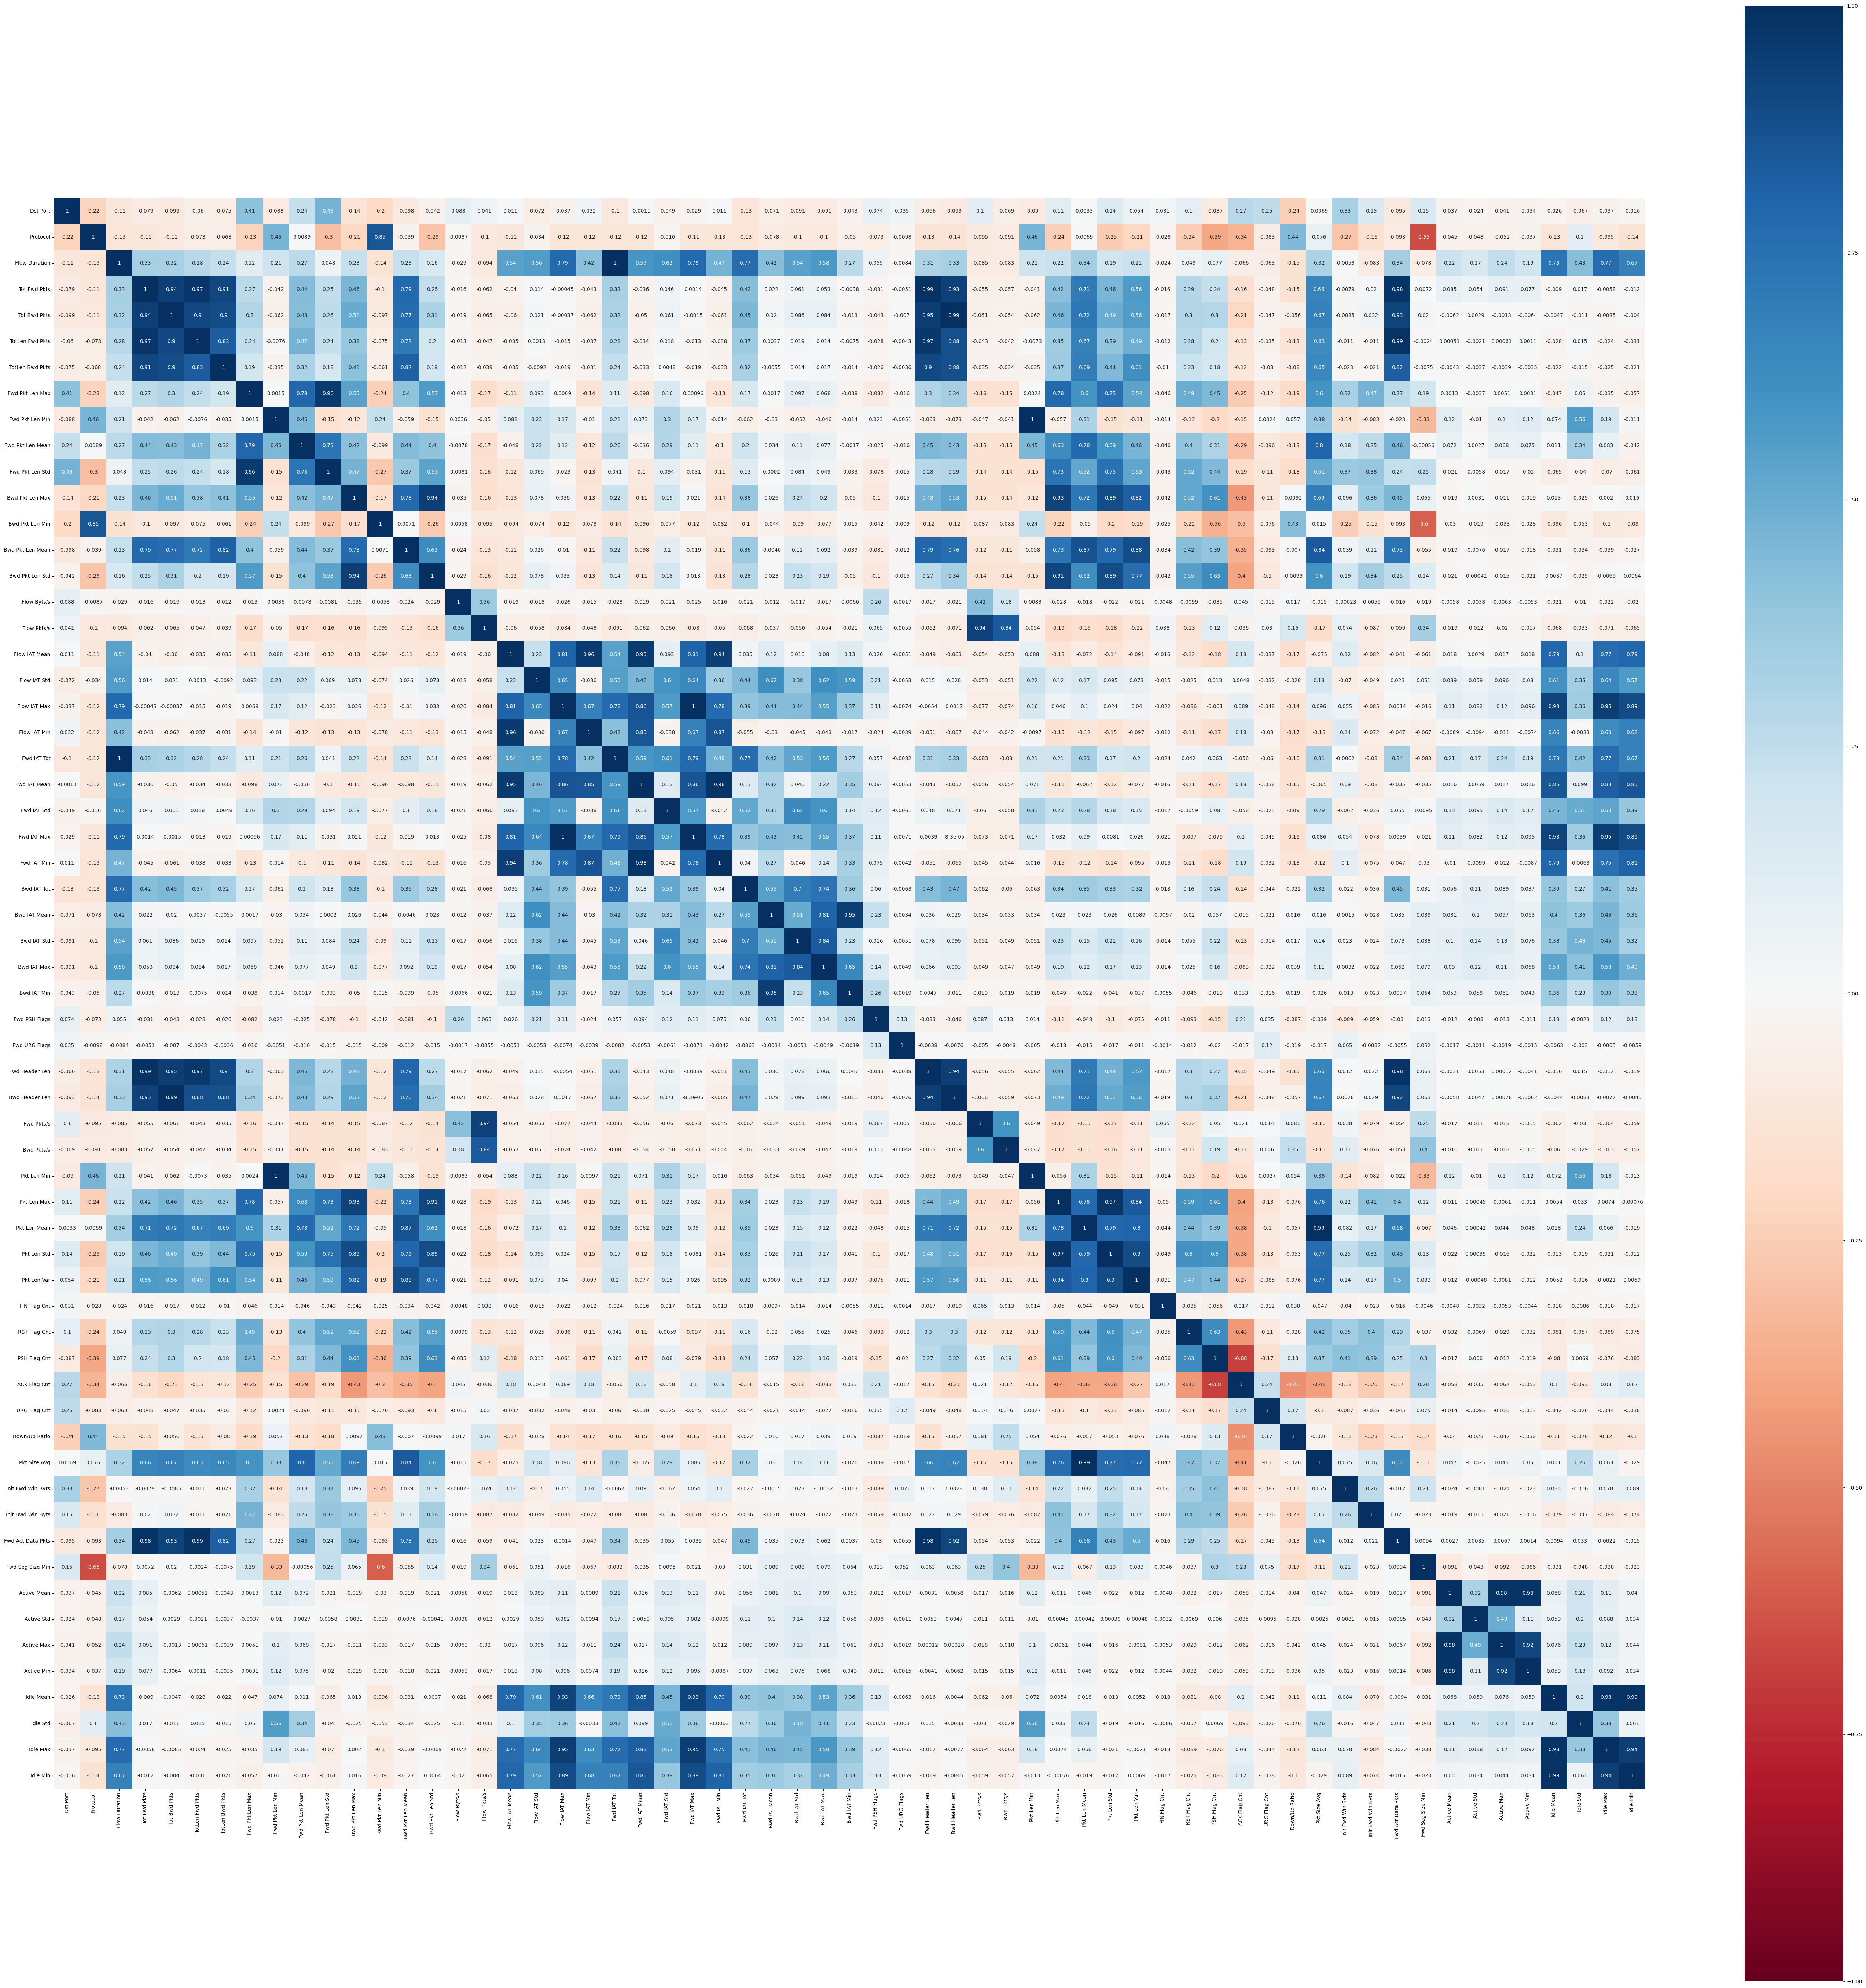

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [29]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
            if (np.abs(corr.iloc[i, j]) >= threshold) and (is_correlated[j]):
                colname = corr.columns[j]
                is_correlated[j]=False
                correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Bwd Pkt Len Std', 'Bwd Pkt Len Max', 'Idle Mean', 'Bwd Header Len', 'Flow IAT Mean', 'TotLen Fwd Pkts', 'Fwd Header Len', 'Active Mean', 'Fwd IAT Mean', 'Tot Fwd Pkts', 'Flow IAT Max', 'Bwd IAT Mean', 'Pkt Len Max', 'Fwd Pkt Len Min', 'Active Max', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Flow Pkts/s', 'Pkt Len Mean', 'Fwd IAT Max', 'Flow Duration', 'Idle Max', 'Tot Bwd Pkts'}
23
CPU times: user 13.9 ms, sys: 850 μs, total: 14.7 ms
Wall time: 14.4 ms


In [30]:
%%time
df_all.drop(correlated_col, axis=1, inplace=True)
print (df_all.shape)

(2000, 40)
CPU times: user 1.26 ms, sys: 972 μs, total: 2.23 ms
Wall time: 1.63 ms


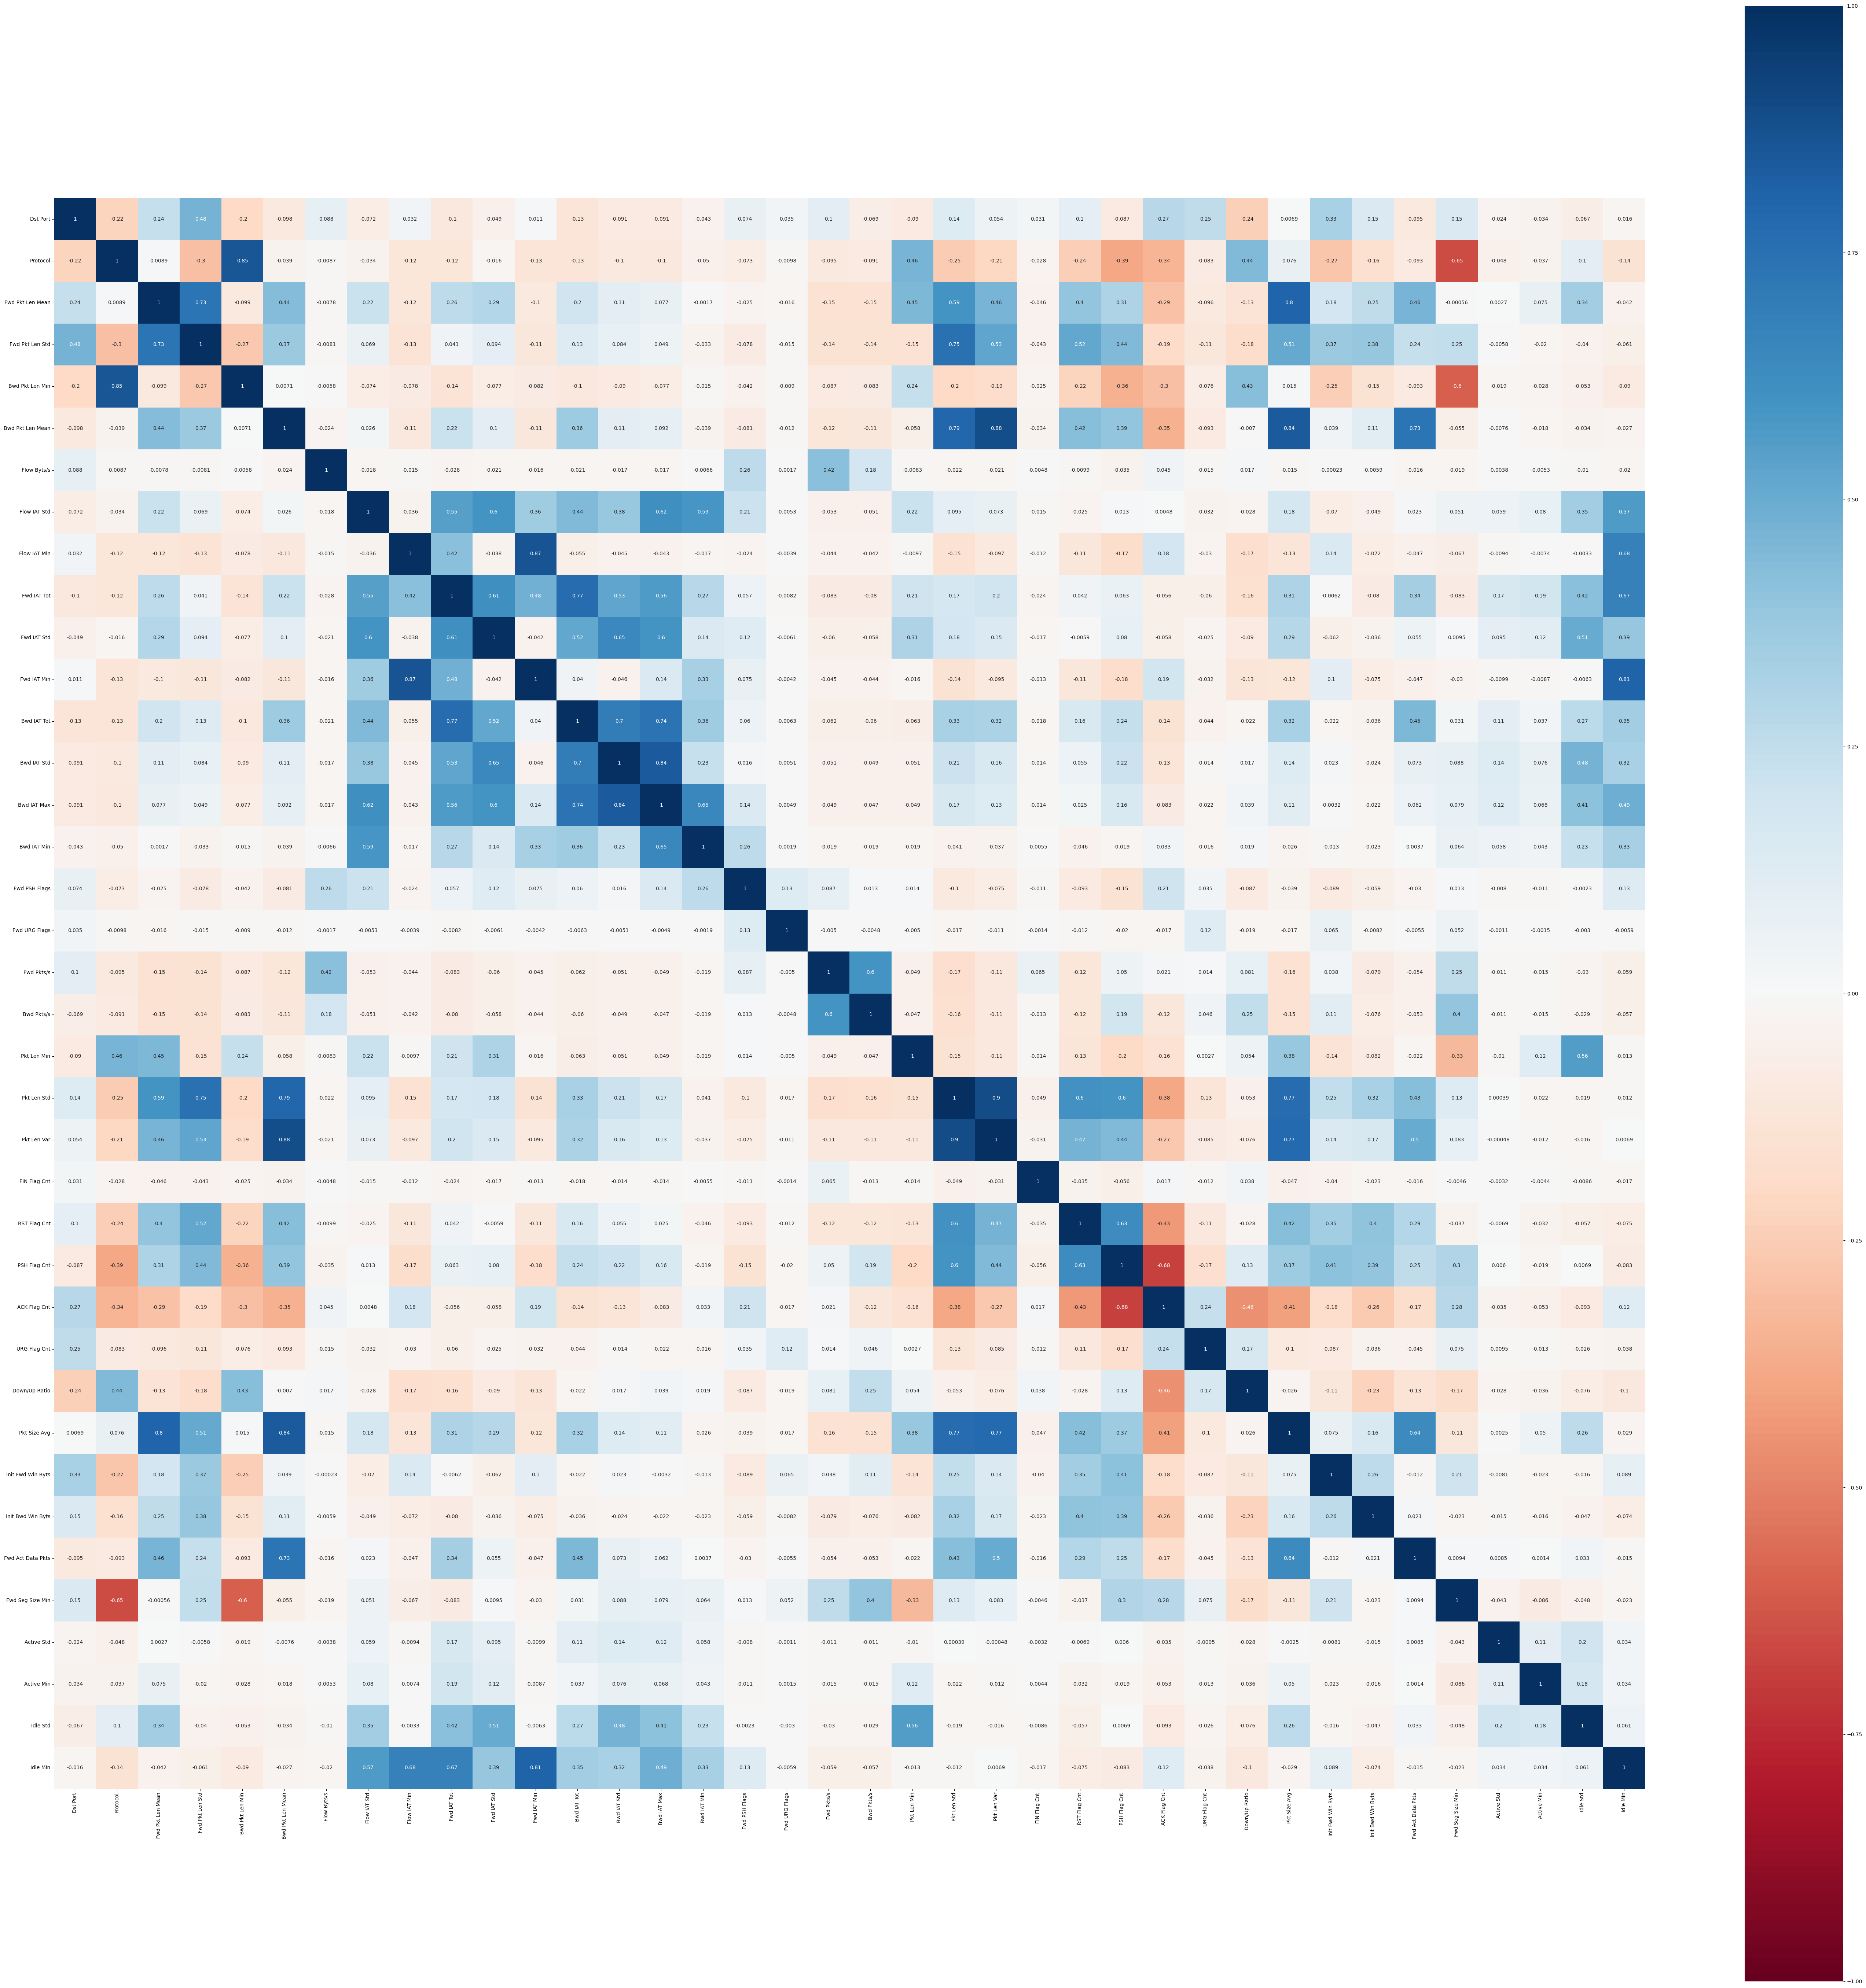

CPU times: user 1.98 s, sys: 77.3 ms, total: 2.06 s
Wall time: 2.16 s


In [31]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [32]:
label_col = "Label"

In [33]:
feature_cols = list(df_all.columns)
feature_cols

['Dst Port',
 'Protocol',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Flow Byts/s',
 'Flow IAT Std',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Std',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Fwd URG Flags',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Std',
 'Active Min',
 'Idle Std',
 'Idle Min',
 'Threat',
 'Label']

In [34]:
label_col = 'Label'

feature_cols.remove("Threat")
feature_cols.remove(label_col)

In [35]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=2, shuffle=True, stratify=df_all[label_col])

del df_all 

In [36]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

minmax_scaler = MinMaxScaler()
train_df[feature_cols] = minmax_scaler.fit_transform(train_df[feature_cols])
test_df[feature_cols] = minmax_scaler.transform(test_df[feature_cols])


In [37]:
order_label_list = list(np.unique(train_df[label_col]))
order_label_list

['Benign',
 'Botnet',
 'Brute-force',
 'DDoS attack',
 'DoS attack',
 'Infilteration',
 'Web attack']

In [41]:
from sklearn.utils import class_weight
import numpy as np

# Convert classes list and labels to numpy arrays 
classes = np.array(order_label_list)
y = np.array(train_df[label_col].values)

class_weights = class_weight.compute_class_weight('balanced',
                                                classes=classes, 
                                                y=y)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: np.float64(0.2857142857142857),
 1: np.float64(2.857142857142857),
 2: np.float64(2.857142857142857),
 3: np.float64(1.4285714285714286),
 4: np.float64(1.4285714285714286),
 5: np.float64(1.4285714285714286),
 6: np.float64(1.4285714285714286)}

In [42]:
import json 
    
with open("class_weights.json", "w") as outfile: 
    json.dump(class_weights, outfile)

In [43]:
import json 

label_dict = {v:v for v in order_label_list}
    
with open("label_dict.json", "w") as outfile: 
    json.dump(label_dict, outfile)


    label_dict

In [44]:
y_train = [order_label_list.index(k) for k in train_df[label_col]]
y_test = [order_label_list.index(k) for k in test_df[label_col]]

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier(n_estimators=100)
%time
model.fit(train_df[feature_cols].values, y_train)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 2.15 μs


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
y_pred = model.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       200
           1       1.00      0.95      0.97        20
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        40
           4       0.95      0.95      0.95        40
           5       0.31      0.20      0.24        40
           6       0.97      0.95      0.96        40

    accuracy                           0.86       400
   macro avg       0.85      0.84      0.85       400
weighted avg       0.84      0.86      0.85       400



In [48]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [feature_cols[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

extratrees_importance       Feature_Name
33               0.185977   Fwd Seg Size Min
0                0.139634           Dst Port
5                0.055494   Bwd Pkt Len Mean
2                0.047755   Fwd Pkt Len Mean
12               0.046727        Bwd IAT Tot
4                0.046334    Bwd Pkt Len Min
30               0.042522  Init Fwd Win Byts
29               0.036156       Pkt Size Avg
19               0.035865         Bwd Pkts/s
16               0.033864      Fwd PSH Flags
32               0.029354  Fwd Act Data Pkts
24               0.025729       RST Flag Cnt
35               0.023932         Active Min
7                0.023063       Flow IAT Std
3                0.020361    Fwd Pkt Len Std
11               0.020039        Fwd IAT Min
21               0.018772        Pkt Len Std
10               0.017647        Fwd IAT Std
18               0.012969         Fwd Pkts/s
14               0.012579        Bwd IAT Max
8                0.011973       Flow IAT Min
31               0.011820  Init Bwd Win Byts
23               0.011270       FIN Flag Cnt
25               0.009907       PSH Flag Cnt
9                0.009769        Fwd IAT Tot
20               0.009174        Pkt Len Min
36               0.009121           Idle Std
34               0.007663         Active Std
13               0.007530        Bwd IAT Std
6                0.007041        Flow Byts/s
15               0.006685        Bwd IAT Min
37               0.006662           Idle Min
28               0.005518      Down/Up Ratio
26               0.004389       ACK Flag Cnt
27               0.004278       URG Flag Cnt
1                0.002425           Protocol
22               0.000000        Pkt Len Var
17               0.000000      Fwd URG Flags

In [65]:
from sklearn.feature_selection import SelectFromModel

selector_model = SelectFromModel(model, prefit=True)

In [66]:
# First create the selector model with correct spelling
selector_model = SelectFromModel(model, prefit=True)

# Replace the incorrect method call
# selected_features = list(selector_model.get_feature_names_out(input_features=feature_cols))

# With the correct approach using get_support
selected_features = list(np.array(feature_cols)[selector_model.get_support()])

In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier(n_estimators=100)
%time
model.fit(train_df[selected_features].values, y_train)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 12.9 μs


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [68]:
y_pred = model.predict(test_df[selected_features].values)
print(classification_report(y_test, y_pred))

del y_pred, y_test, y_train

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       200
           1       1.00      0.95      0.97        20
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        40
           4       0.97      0.95      0.96        40
           5       0.23      0.12      0.16        40
           6       0.97      0.90      0.94        40

    accuracy                           0.85       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.82      0.85      0.83       400



In [69]:
train_df[feature_cols+[label_col]].to_csv("train_df.csv",index=False)
test_df[feature_cols+[label_col]].to_csv("test_df.csv",index=False)

In [70]:
del train_df, test_df

In [71]:
with open('processed_data/class_weights.json', 'w') as f:
    json.dump(class_weights, f)
with open('processed_data/label_dict.json', 'w') as f:
    json.dump(label_dict, f)